In [2]:
import gym
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from gym.wrappers import GrayScaleObservation, ResizeObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3 import PPO

class FixedJoypadSpace(JoypadSpace):
    def reset(self, **kwargs):
        # Remove all unsupported arguments
        kwargs.pop('seed', None)
        kwargs.pop('options', None)
        return super().reset()

# 1. Create base environment with API compatibility
env = gym_super_mario_bros.make('SuperMarioBros-v3', apply_api_compatibility=True, render_mode="human")

# 2. Apply the fixed wrapper
env = FixedJoypadSpace(env, SIMPLE_MOVEMENT)

# 3. Apply observation wrappers
env = GrayScaleObservation(env, keep_dim=True)
env = ResizeObservation(env, shape=(84, 84))

# 4. Vectorize environment
env = DummyVecEnv([lambda: env])

# 5. Stack frames
env = VecFrameStack(env, n_stack=4, channels_order='last')

# Create and train model
model = PPO("CnnPolicy", env, verbose=1, 
            n_steps=512, 
            batch_size=64,
            tensorboard_log="./logs/")

model.learn(total_timesteps=1000000)

C:\Users\saina\anaconda3\Lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(
C:\Users\saina\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Wrapping the env in a VecTransposeImage.
Logging to ./logs/PPO_1


C:\Users\saina\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
C:\Users\saina\anaconda3\Lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 168 |
|    iterations      | 1   |
|    time_elapsed    | 3   |
|    total_timesteps | 512 |
----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 122         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 1024        |
| train/                  |             |
|    approx_kl            | 0.043623555 |
|    clip_fraction        | 0.262       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.92       |
|    explained_variance   | -0.00625    |
|    learning_rate        | 0.0003      |
|    loss                 | 10.3        |
|    n_updates            | 10          |
|    policy_gradient_loss | 0.00189     |
|    value_loss           | 95.9        |
-----------------------------------------
-----------------------------------------

Available Tags: {'images': [], 'audio': [], 'histograms': [], 'scalars': ['time/fps', 'train/approx_kl', 'train/clip_fraction', 'train/clip_range', 'train/entropy_loss', 'train/explained_variance', 'train/learning_rate', 'train/loss', 'train/policy_gradient_loss', 'train/value_loss'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


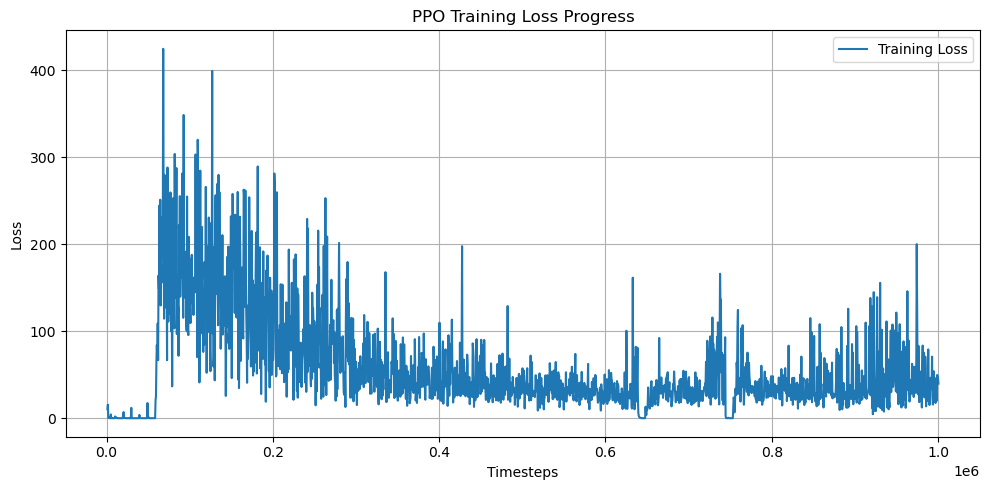

In [4]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Path to your TensorBoard log folder
log_dir = "./logs/"

# List all run folders
runs = [os.path.join(log_dir, d) for d in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, d))]

# Choose the first run (adjust if needed)
event_path = runs[0]

# Load TensorBoard logs
event_acc = EventAccumulator(event_path)
event_acc.Reload()

# List available tags (to identify the correct key)
tags = event_acc.Tags()
print("Available Tags:", tags)

# Get the training loss values (adjust key as necessary)
losses = event_acc.Scalars('train/loss')  # Change key to other metrics if needed

# Extract timesteps (steps) and loss values
timesteps = [e.step for e in losses]
loss_values = [e.value for e in losses]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(timesteps, loss_values, label="Training Loss")
plt.xlabel("Timesteps")
plt.ylabel("Loss")
plt.title("PPO Training Loss Progress")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Available Tags: {'images': [], 'audio': [], 'histograms': [], 'scalars': ['time/fps', 'train/approx_kl', 'train/clip_fraction', 'train/clip_range', 'train/entropy_loss', 'train/explained_variance', 'train/learning_rate', 'train/loss', 'train/policy_gradient_loss', 'train/value_loss'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


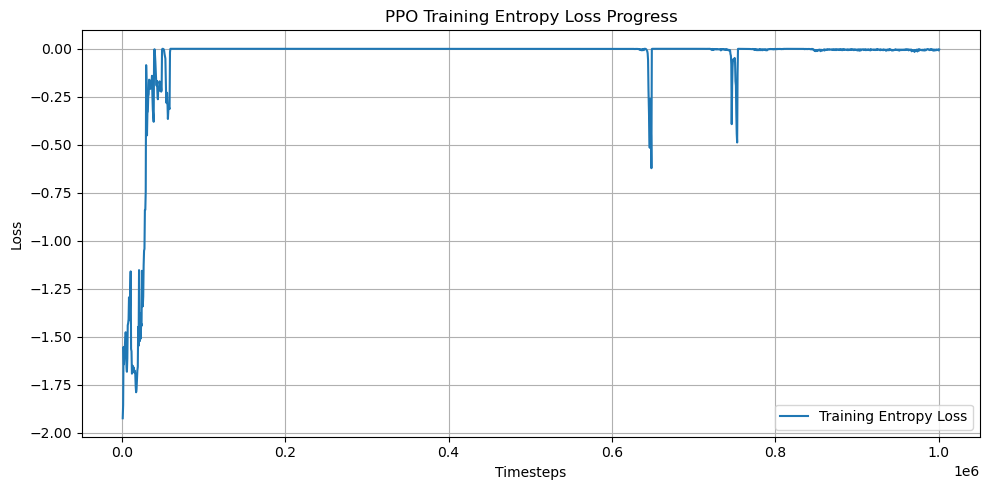

In [5]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Path to your TensorBoard log folder
log_dir = "./logs/"

# List all run folders
runs = [os.path.join(log_dir, d) for d in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, d))]

# Choose the first run (adjust if needed)
event_path = runs[0]

# Load TensorBoard logs
event_acc = EventAccumulator(event_path)
event_acc.Reload()

# List available tags (to identify the correct key)
tags = event_acc.Tags()
print("Available Tags:", tags)

# Get the training entropy loss values (change key if needed)
entropy_loss = event_acc.Scalars('train/entropy_loss')  # Change to 'train/explained_variance' or another metric

# Extract timesteps (steps) and loss values
timesteps = [e.step for e in entropy_loss]
entropy_values = [e.value for e in entropy_loss]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(timesteps, entropy_values, label="Training Entropy Loss")
plt.xlabel("Timesteps")
plt.ylabel("Loss")
plt.title("PPO Training Entropy Loss Progress")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()